
# Análise dos Dados do Airbnb - *Barcelona* <a class="tocSkip">

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Importando as bibliotecas necessárias e conhecendo os dados

Vamos começar importando as bibliotecas que serão utilizadas em nossa análise:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.cm as cm

O portal oferece *datasets* detalhados com várias variáveis e *datasets* resumidos, com apenas algumas variáveis de maior interesse. Nessa análise preliminar, usaremos um destes *datasets* resumidos. De acordo com o site, trata-se de um conjunto de dados entre 7 de julho de 2020 e 7 de julho de 2021 para a cidade de Barcelona.

Vamos verificar o perfil do nosso *dataset*, analisando as 5 primeiras entradas.

In [2]:
data = 'data/listings_barcelona_summary.csv'

df = pd.read_csv(data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,169,1,21,2019-10-11,0.23,18,60,0,HUTB-002062
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,240,3,52,2019-12-15,0.78,2,169,0,HUTB-005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.62,3,8,0,HUTB-001722
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2012-12-30,0.06,2,35,0,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,283,4,150,2020-03-11,1.54,2,148,1,HUTB-001506


As variáveis (colunas) disponibilizadas e seus significados são:

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião, geralmente apenas o primeiro nome
* `neighbourhood_group` - nome do distrito onde se encontra o bairro da propriedade
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de propriedade que é oferecida. Pode ser:
    - entire place/apt - toda a propriedade
    - private room - quarto
    - shared room - quarto compartilhado
    - hotel room - quarto de hotel
* `price` - preço diário para alugar o imóvel em moeda local
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a propriedade possui nos últimos 12 meses
* `license` - o número de licença/permissão/registro. Será explicado em detalhes adiante

Vamos ter uma noção do tamanho de nosso conjunto de dados:

In [4]:
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

Entradas:	 17079
Variáveis:	 18



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17079 entries, 0 to 17078
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17079 non-null  int64  
 1   name                            17069 non-null  object 
 2   host_id                         17079 non-null  int64  
 3   host_name                       17030 non-null  object 
 4   neighbourhood_group             17079 non-null  object 
 5   neighbourhood                   17079 non-null  object 
 6   latitude                        17079 non-null  float64
 7   longitude                       17079 non-null  float64
 8   room_type                       17079 non-null  object 
 9   price                           17079 non-null  int64  
 10  minimum_nights                  17079 non-null  int64  
 11  number_of_reviews               17079 non-null  int64  
 12  last_review                     

É possível perceber que há dados ausentes em algumas colunas. Vamos verificar a quantidade relativa de dados ausentes, ordenando-os decrescentemente:

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.376369
reviews_per_month                 0.298320
last_review                       0.298320
host_name                         0.002869
name                              0.000586
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

## Peculiaridades legais e características locais

Verificamos que a coluna com mais dados ausentes se refere ao número de licença do imóvel. Esta é uma característica de Barcelona. Na metade final da década de 2010, [a cidade sofria com o grande número de turistas](https://en.wikipedia.org/wiki/Barcelona#Tourism). Autoridades locais pararam, então, de dar novas licenças para hotéis e aluguéis por temporada, além de multarem o AirBnb. 

Vemos acima que cerca de 37 % dos registros não apresentam número de licença e, portanto, podem não estar seguindo as leis locais.

Vamos, agora, olhar com mais detalhes os dados não numéricos disponíveis. O método `describe`, quando utilizado excluindo dados numéricos, permite avaliar os termos mais frequentes, além de contabilizar termos únicos em cada coluna:

In [7]:
df.describe(exclude=[float, int])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license
count,17069,17030,17079,17079,17079,11984,10651
unique,16460,3663,10,72,4,1773,4892
top,Central 2 bedroom apartment in Bailén,Eva&Jack,Eixample,la Dreta de l'Eixample,Entire home/apt,2020-03-08,Exempt
freq,22,174,5931,1958,8893,121,4291


No dicionário de variáveis, esclarecemos que `neighbourhood` se refere aos bairros da localidade e `neighbourhood_group` aos distritos. Assim, os dados estão coerentes pois [há 10 distritos em Barcelona](https://pt.wikipedia.org/wiki/Barcelona) e 73 bairros. Logo, apenas um bairro não apresenta imóvel listado no Airbnb.

O bairro mais presente em anúncios é [Dreta de l'Eixample](https://en.wikipedia.org/wiki/Dreta_de_l%27Eixample), onde fica a [Plaça de Catalunya](https://en.wikipedia.org/wiki/Pla%C3%A7a_de_Catalunya), o centro da cidade, e duas das principais ruas de comércio [Rambla de Catalunya](https://en.wikipedia.org/wiki/Rambla_de_Catalunya) e [Passeig de Gràcia](https://en.wikipedia.org/wiki/Passeig_de_Gr%C3%A0cia). É um dos bairros mais luxuosos de Barcelona.

<figure>
    <center><img alt="Plaça de Catalunya" width="70%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Catalunya_Barcelona1_tango7174.jpg/450px-Catalunya_Barcelona1_tango7174.jpg"></center>
    <figcaption><center>Plaça de Catalunya</center></figcaption>
</figure>


Chama a atenção que a data que mais aparece na coluna `last_review` seja 8 de março de 2020. Oficialmente, o lockdown devido à pandemia começou em [14 de março de 2020](https://urbannext.net/barcelona-lockdown-2020/). Esse dado pode indicar que algumas locações ainda não tiveram novos aluguéis mesmo após a reabertura da cidade. No entanto, devemos estar atentos que as colunas referentes a reviews também apresentam índice elevado de ausência de dados (29,8 %), indicando que muitos usuários simplesmente não fazem reviews. Além disso, atente-se que esta é a data que mais aparece e não a data mais recente registrada.

### Presença de empresas do ramo imobiliário

O *host* mais comum é "Eva&Jack". Vamos verificar o `host_id`:

In [8]:
df[df['host_name'] == "Eva&Jack"]['host_id'].unique()

array([4459553])

In [9]:
# porcentagem de entradas para este ID
df[df['host_name'] == "Eva&Jack"]['host_id'].count() / df.shape[0] * 100

1.0187950114175301

Com essa informação, conseguimos [localizar a página do usuário](https://www.airbnb.com.br/users/show/4459553) na plataforma do AirBnb e vemos que possui relação com [uma imobiliária](https://www.apartmentbarcelona.com/). Desta forma, faz sentido a grande frequência (174 vezes, 1 % dos registros) de aparições tendo em vista que dificilmente uma pessoa física teria tantas entradas, mesmo considerando a possibilidade de aluguel de quartos em mais de uma propriedade.

O nome de identificação de anúncio mais comum é "Central 2 bedroom apartment in Bailén". Fazendo uma breve análise, vemos que todos os 22 anúncios com esse nome vêm de um mesmo *host*, "Sleep", embora tal *host* tenha diferentes IDs:

In [10]:
df[df['name'] == 'Central 2 bedroom apartment in Bailén']['host_name'].unique()

array(['Sleep'], dtype=object)

In [11]:
df[df['host_name'] == 'Sleep']['host_id'].unique()

array([264969939, 265143570, 265180440, 265335721, 265147782])

In [12]:
df[df['host_name'] == 'Sleep']['room_type'].unique()

array(['Hotel room', 'Entire home/apt', 'Private room'], dtype=object)

Pelo tipo de propriedade anunciada, vemos que se trata também de [uma empresa que aluga imóveis e quartos de hotéis](https://www.sleepbystay.com/).

## Avaliando dados numéricos e limpando o dataframe

Vamos agora fazer uma análise preliminar das variáveis numéricas:

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.707900e+04,1.707900e+04,17079.000000,17079.000000,17079.000000,17079.000000,17079.000000,11984.000000,17079.000000,17079.000000,17079.000000
mean,2.717895e+07,1.141008e+08,41.392045,2.167038,115.013994,12.217577,32.548100,1.012710,17.973476,167.022484,1.954330
std,1.512193e+07,1.174252e+08,0.014600,0.017812,312.660261,29.996519,65.201064,1.200465,35.705521,133.622862,5.900879
min,1.867400e+04,3.073000e+03,41.349430,2.089110,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.480228e+07,8.964998e+06,41.380585,2.156680,39.000000,1.000000,0.000000,0.150000,1.000000,20.000000,0.000000
50%,2.852894e+07,6.134564e+07,41.389530,2.167960,69.000000,3.000000,4.000000,0.570000,3.000000,158.000000,0.000000
75%,4.085153e+07,2.046628e+08,41.401830,2.177610,132.000000,30.000000,33.000000,1.500000,15.000000,307.000000,1.000000
max,5.087501e+07,4.112358e+08,41.463060,2.228480,9999.000000,1124.000000,831.000000,14.570000,174.000000,365.000000,133.000000


Não faz muito sentido manter as colunas referentes a IDs, assim como análise de estatística descritiva de latitude e longitude também podem ser retiradas:

In [14]:
exclude_describe = ['id', 'host_id', 'latitude', 'longitude']

df[list(set(df.columns) - set(exclude_describe))].describe()

,number_of_reviews_ltm,availability_365,price,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
count,17079.000000,17079.000000,17079.000000,17079.000000,17079.000000,11984.000000,17079.000000
mean,1.954330,167.022484,115.013994,12.217577,17.973476,1.012710,32.548100
std,5.900879,133.622862,312.660261,29.996519,35.705521,1.200465,65.201064
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,0.000000,20.000000,39.000000,1.000000,1.000000,0.150000,0.000000
50%,0.000000,158.000000,69.000000,3.000000,3.000000,0.570000,4.000000
75%,1.000000,307.000000,132.000000,30.000000,15.000000,1.500000,33.000000
max,133.000000,365.000000,9999.000000,1124.000000,174.000000,14.570000,831.000000


Vemos pela coluna `calculated_host_listings_count` que parte significativa dos hosts possui entre 1 e 3 imóveis, indício de serem pessoas físicas. Valores maiores provavelmente indicam empresas e imobiliárias, conforme descrito anteriormente.

O preço máximo que aparece, "9999.00", provavelmente é devido a preenchimento equivocado na plataforma. E também é estranho preço mínimo zero, talvez seja referente a anúncios onde o proprietário solicita contato para negociar valor. Da mesma forma, o máximo em `minimum_nighs` não parece fazer sentido, sendo um número acima de 3 anos.

Vamos ver histogramas dessas variáveis para ter uma primeira impressão de eventuais distorções nos dados:

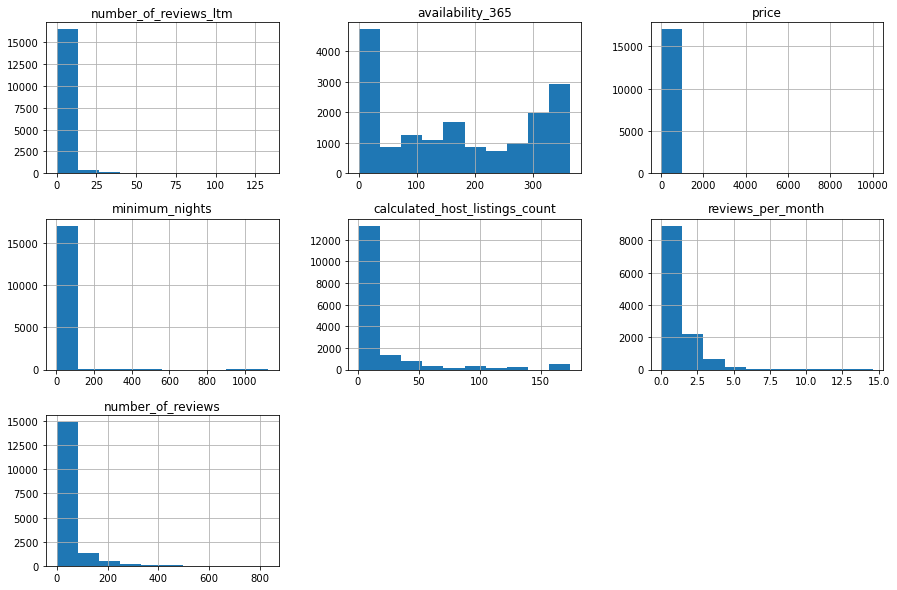

In [15]:
df[list(set(df.columns) - set(exclude_describe))].hist(bins=10, figsize=(15,10));

O gráfico de disponibilidade é interessante, tendo um perfil bimodal. A disponibilidade se refere a quantos dias o proprietário disponibiliza o imóvel. Pode ser alguns dias ou semanas do ano ou mesmo o ano todo. O perfil indica que há muitos anúncios para poucos dias, provavelmente de residentes que alugam quartos ou alugam toda a propriedade em finais de semana e férias, e também há uma quantidade significativa de anúncios para longos períodos, coerente com o já discutido da presença de empresas.

Parte significativa dos anúncios apresenta poucos reviews. Talvez reflexo dos imóveis disponíveis por pouco tempo, que podem não ser alugados frequentemente. Ou ainda efeito da pandemia, para validar essa hipótese seria necessário comparar com bases de dados anteriores a fevereiro/março de 2020.

### Critérios de eliminação de dados

Como já dito, o número máximo em `minimum_nights` não parece fazer sentido. Talvez um bom critério de limpeza seja eliminar valores que representam menos de 1 % de toda a base. Vamos ver qual limite de dias atende esse critério:

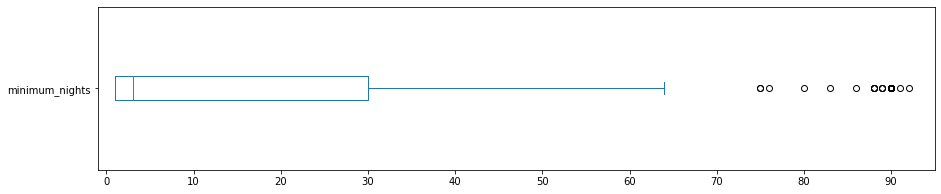

minimum_nights: valores acima de 90:
94 entradas
0.5504%


In [16]:
limite_dias = 90

df['minimum_nights'].plot(kind='box', vert=False, xlim=(-1, limite_dias + 5), 
                          figsize=(15, 3))
plt.xticks([i for i in range(0, limite_dias + 5, 10)])
plt.show()

print(f"minimum_nights: valores acima de {limite_dias}:")
print("{} entradas".format(len(df[df.minimum_nights > limite_dias])))
print("{:.4f}%".format((len(df[df.minimum_nights > limite_dias]) / df.shape[0])*100))

Eliminar entradas acima de 90 dias de mínimo retira apenas 0,55 % da base de dados, o que parece razoável.

Vemos que cerca de 75 % dos anúncios ficam entre 1 e 30 dias de mínimo, sendo a mediana em 3 noites de mínimo, provavelmente associado a finais de semana. Uma base de dados mais completa, com data de início e fim dos aluguéis poderia corroborar essa relação.

Um *dataset* mais robusto também poderia permitir relacionar a disponibilização de períodos mais longos com épocas de férias e com o verão europeu. A base de dados aqui utilizada não apresenta datas.

Como já dito, o número máximo em `price` não parece fazer sentido. Talvez um bom critério de limpeza seja eliminar valores que representam menos de 1 % de toda a base. Vamos ver qual limite de preço atende esse critério:

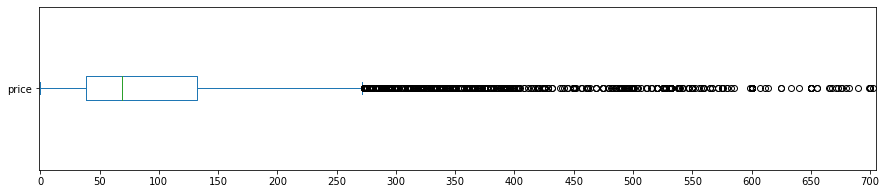


price: valores acima de 700
160 entradas
0.9368%


In [17]:
limite_preco = 700

df['price'].plot(kind='box', vert=False, xlim=(-1, limite_preco + 5), figsize=(15, 3))
plt.xticks([i for i in range(0, limite_preco + 5, 50)])
plt.show()

print(f"\nprice: valores acima de {limite_preco}")
print("{} entradas".format(len(df[df.price > limite_preco])))
print("{:.4f}%".format((len(df[df.price > limite_preco]) / df.shape[0])*100))

Eliminar valores acima de 700 parece ser um bom critério. Como vimos no `describe` e se faz mais evidente no boxplot, 75 % dos valores se encontram até 132 euros, e valores acima de cerca de 275 euros já caem no critério de outliers.

A presença de tais valores elevados e, provavelmente, errôneos pode causar uma grande distorção da média frente à mediana, conforme a célula seguinte:

In [18]:
print('Mediana: ', df['price'].median())
print('Média: ', df['price'].mean())

Mediana:  69.0
Média:  115.01399379354763


## Novo dataframe

Vamos, então, gerar um novo *dataframe* onde os valores acima dos limites estabelecidos são eliminados.

In [19]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['price'] > limite_preco].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > limite_dias].index, axis=0, inplace=True)

Vamos ver os `describe` desse novo *dataframe*:

In [20]:
df_clean.describe(exclude=[float, int])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license
count,16818,16779,16828,16828,16828,11864,10512
unique,16215,3627,10,72,4,1766,4819
top,Central 2 bedroom apartment in Bailén,Eva&Jack,Eixample,la Dreta de l'Eixample,Entire home/apt,2020-03-08,Exempt
freq,22,174,5855,1920,8704,120,4247


In [21]:
df_clean[list(set(df_clean.columns) - set(exclude_describe))].describe()

,number_of_reviews_ltm,availability_365,price,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews
count,16828.000000,16828.000000,16828.000000,16828.000000,16828.000000,11864.000000,16828.000000
mean,1.979617,166.147908,97.729439,10.788923,17.959651,1.016011,32.773770
std,5.938954,133.318279,88.444444,15.131916,35.683715,1.201698,65.450461
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,0.000000,19.000000,39.000000,1.000000,1.000000,0.150000,0.000000
50%,0.000000,157.000000,67.000000,3.000000,3.000000,0.580000,4.000000
75%,1.000000,306.000000,130.000000,30.000000,15.000000,1.510000,34.000000
max,133.000000,365.000000,700.000000,90.000000,174.000000,14.570000,831.000000


Como vemos, não houve grandes variações tendo em vista que eliminamos poucos dados. Tudo descrito anteriormente continua válido.  Vamos olhar os histogramas para as variáveis numéricas:

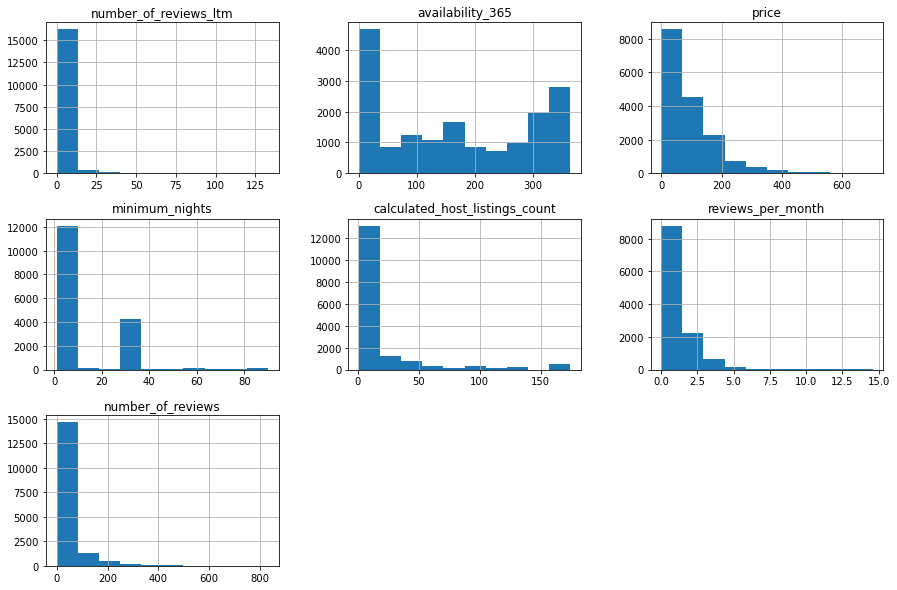

In [22]:
df_clean[list(set(df.columns) - set(exclude_describe))].hist(bins=10, figsize=(15,10));

Com a retirada dos valores extremos e errôneos, os perfis para o mínimo de noites e para o preço fazem mais sentido.

Vemos que há um número não desprezível de ofertas para estadia de um mês. Considerando a escala do histograma, trata-se de cerca de 25 % do total de ofertas de aluguel. Isso explica o distanciamento entre média e mediana para a coluna `minimum_nights`:

In [23]:
print('Mediana: ', df_clean['minimum_nights'].median())
print('Média: ', df_clean['minimum_nights'].mean())

Mediana:  3.0
Média:  10.78892322319943


A média acaba por sofrer efeito dessa grande quantidade de valores mais elevados.

No gráfico de preços, vemos agora claramente o quanto cai a oferta de aluguéis para valores acima de 200 euros.

Os gráficos a seguir mostram os dados para `minimum_nights` e `price` em porcentagem, facilitando a compreensão das discussões anteriores a respeito das proporções:

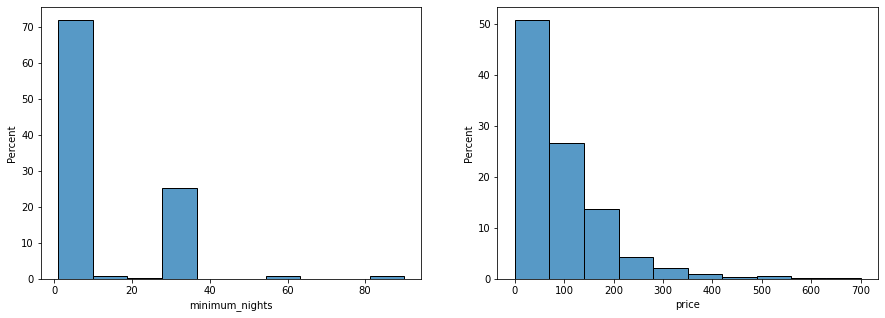

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_clean['minimum_nights'], bins=10, stat='percent', ax=ax[0])
sns.histplot(df_clean['price'], bins=10, stat='percent', ax=ax[1])
plt.show()

Antes da limpeza dos dados, vimos que a média de preços era quase o dobro da mediana. Na célula seguinte, vemos que a diferença diminuiu significativamente:

In [25]:
print('Mediana: ', df_clean['price'].median())
print('Média: ', df_clean['price'].mean())

Mediana:  67.0
Média:  97.72943903018778


## Matriz de correlação

Mesmo sendo um *dataset* resumido, podemos verificar se há correlações entre as variáveis. Vamos criar uma matriz de correlações:

In [26]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.176320,0.064551,0.071253,0.201399,0.157947
minimum_nights,-0.176320,1.000000,-0.228507,-0.249811,0.134748,0.141292
number_of_reviews,0.064551,-0.228507,1.000000,0.723431,-0.121815,0.033378
reviews_per_month,0.071253,-0.249811,0.723431,1.000000,-0.073711,0.061479
calculated_host_listings_count,0.201399,0.134748,-0.121815,-0.073711,1.000000,0.189179
availability_365,0.157947,0.141292,0.033378,0.061479,0.189179,1.000000


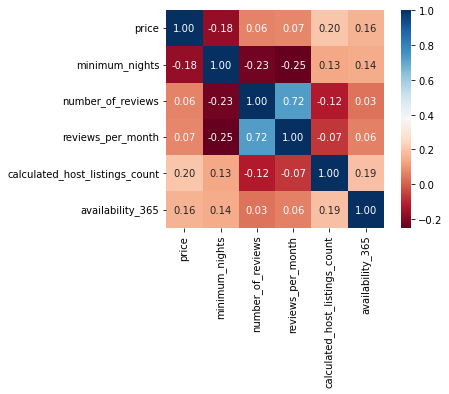

In [27]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A primeira correlação é relativamente óbvia, entre `number_of_reviews` e `reviews_per_month`. É de se esperar que um maior número de reviews leve a uma maior média de reviews por mês, daí o elevado valor de correlação positiva.

Ainda avaliando correlações positivas, não há mais valores tão elevados quanto o anterior, mas há alguns interessantes:

- `calculated_host_listings_count` x `price`: com valor de 0.20, indica que proprietários com mais anúncios listados cobram um maior preço. Pode ser uma indicação de que empresas cobram mais que pessoas físicas, possivelmente pelos custos inerentes da administração do negócio;
- `calculated_host_listings_count` x `availability_365`: com valor de 0.19, indica que proprietários com mais anúncios listados oferecem mais dias no calendário. Novamente, faz sentido com o já destacado da presença de empresas do ramo imobiliário. Tanto que vemos uma correlação `availability_365` x `price` com valor 0.16, condizente com o discutido no item anterior;
- `calculated_host_listings_count` x `minimum_nights`: com valor de 0.13, indica que empresas tendem a fornecer mais anúncios para longas estadias.

No que diz respeito a correlações negativas:

- `number_of_reviews` x `minimum_nights` e `reviews_per_month` x `minimum_nights`: valores de -0.23 e -0.25, respectivamente. Indica que anúncios para estadias mais longas possuem menos reviews. Pode ser uma consequência da própria natureza do imóvel, menos disponibilidade, consequentemente menos pessoas alugam por ano, portanto menos reviews. No entanto, pode também ser um indicativo de que ainda não há confiança das pessoas em aluguéis de longo prazo no atual contexto de pandemia pela possibilidade de lockdowns e restrições. Seria interessante avaliar essa correlação numa base maior e com dados temporais para confirmar essa hipótese.
- `minimum_nights` x `price`: valor de -0.18, indicando que quanto mais longa a estadia, menos é cobrado por noite. Já esperado neste ramo de negócio.

## Tipo de imóvel

Vamos avaliar agora a oferta por tipo de imóvel. Começando pelos números absolutos e em porcentagem:

In [28]:
# absoluto
df_clean.room_type.value_counts()

Entire home/apt    8704
Private room       7665
Hotel room          257
Shared room         202
Name: room_type, dtype: int64

In [29]:
# porcentagem
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    51.723318
Private room       45.549085
Hotel room          1.527217
Shared room         1.200380
Name: room_type, dtype: float64

Vemos claramente que o mercado é dominado por ofertas para aluguel de toda a propriedade ou de quartos. A oferta de quartos de hotel somada com a oferta de quartos compartilhados não chega a 3 % do total.

Os histogramas a seguir ilustram graficamente o discutido:

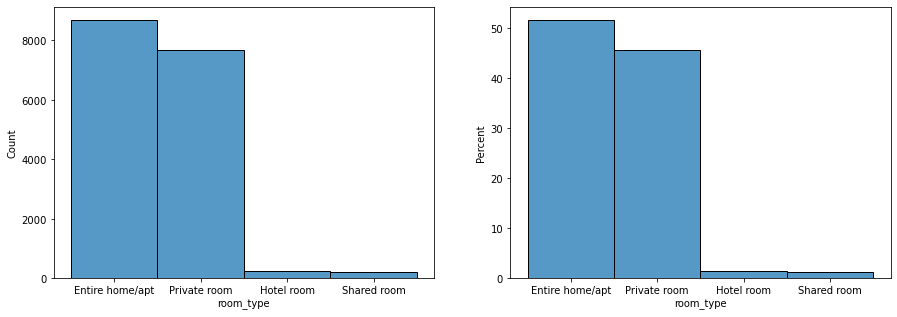

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_clean['room_type'], bins=4, stat='count', ax=ax[0])
sns.histplot(df_clean['room_type'], bins=4, stat='percent', ax=ax[1])
plt.show()

## Variação de preço por localidade

### Análise por distrito

Para avaliar os preços das ofertas por localidade, podemos dividir a análise de duas formas: por distrito e por bairro. Vamos começar por uma divisão distrital, vendo o mapa de Barcelona dividido por distritos:

<figure>
    <center><img alt="Distritos de Barcelona" width="40%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Barcelona_districtes.svg/424px-Barcelona_districtes.svg.png"></center>
    <figcaption><center>Distritos de Barcelona</center></figcaption>
</figure>


Vamos verificar a oferta de anúncios por distrito:

In [31]:
df_clean.groupby(['neighbourhood_group']).count()['id'].sort_values(ascending=False)

neighbourhood_group
Eixample               5855
Ciutat Vella           3834
Sants-Montjuïc         1979
Sant Martí             1592
Gràcia                 1470
Sarrià-Sant Gervasi     711
Horta-Guinardó          550
Les Corts               363
Sant Andreu             246
Nou Barris              228
Name: id, dtype: int64

Vemos que o distrito de Eixample é o que possui mais anúncios. Já falamos sobre esse distrito no início de nossa análise, onde vimos que é onde se encontram o centro da cidade e grandes centros comerciais.

Os três distritos seguintes são [Ciutat Vella](https://en.wikipedia.org/wiki/Ciutat_Vella), [Sants-Montjuïc](https://en.wikipedia.org/wiki/Sants-Montju%C3%AFc) e [Sant Martí](https://en.wikipedia.org/wiki/Sant_Mart%C3%AD_(district)), todos banhados pelo Mar Mediterrâneo e, portanto, interessantes para turistas. Ciutat Vella é considerada o centro da cidade e se junta a Eixample e Gràcia através da Plaça de Catalunya já discutida no início de nossa análise.

Ao ordenar os distritos pela média de preço dos imóveis ofertados, vemos algumas alterações na ordem comparando com o resultado anterior:

In [32]:
df_clean.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood_group
Eixample               116.704697
Sarrià-Sant Gervasi    103.926864
Sant Martí             103.182161
Les Corts               96.471074
Gràcia                  93.396599
Ciutat Vella            88.089202
Sants-Montjuïc          80.104598
Horta-Guinardó          60.958182
Sant Andreu             49.044715
Nou Barris              39.307018
Name: price, dtype: float64

Eixample ainda é o distrito que aparece em primeiro lugar, mas há diversas alterações a seguir. O distrito de [Sarrià-Sant Gervasi](https://en.wikipedia.org/wiki/Sarri%C3%A0-Sant_Gervasi) aparece em segundo lugar. Esse maior preço médio pode se explicar por ser um distrito conhecido por ser de classe alta, tendo a maior renda per capita de Barcelona, e possuindo muitos lugares históricos. Na mesma linha se explica o distrito de [Les Corts](https://en.wikipedia.org/wiki/Les_Corts_(district)), que ainda possui o atrativo do [Camp Nou](https://en.wikipedia.org/wiki/Camp_Nou), famoso estádio do Barcelona FC. Já Sant Martí possui bairros com praias tendo em vista o Mediterrâneo, além de ter a Vila Olímpica construída para a Olimpíada de 1992 e locais para diversão noturna.

### Análise por bairro

Vamos agora analisar por bairros. O mapa a seguir apresenta os bairros de Barcelona. As linhas vermelhas mais grossas separam os distritos:

<figure>
    <center><img alt="Bairros de Barcelona" width="100%" src="https://barcelonamap360.com/website/var/tmp/image-thumbnails/0/648/thumb__map/barcelona-neighborhood-map.pjpeg"></center>
    <figcaption><center>Bairros de Barcelona</center></figcaption>
</figure>

Primeiro, vamos ordenar os bairros por quantidade de ofertas de forma decrescente. Mantive a coluna de distrito para facilitar a relação com as discussões já feitas anteriormente:

In [33]:
df_clean.groupby(['neighbourhood', 'neighbourhood_group'])['price'].count().sort_values(ascending=False)[:10]

neighbourhood                          neighbourhood_group
la Dreta de l'Eixample                 Eixample               1920
el Raval                               Ciutat Vella           1295
el Barri Gòtic                         Ciutat Vella           1124
Sant Pere, Santa Caterina i la Ribera  Ciutat Vella           1016
la Sagrada Família                     Eixample                996
l'Antiga Esquerra de l'Eixample        Eixample                950
la Vila de Gràcia                      Gràcia                  937
el Poble Sec                           Sants-Montjuïc          890
Sant Antoni                            Eixample                818
la Nova Esquerra de l'Eixample         Eixample                676
Name: price, dtype: int64

Como era de se esperar, das primeiras 10 posições, 9 são de bairros da região central da cidade e apenas 1 da região mediterrânea. Condizente com o visto na análise por distrito.

Agora, quando ordenados por média de preço, vemos predomínio de bairros da região do Mediterrâneo, em especial do distrito de Sant Martí, e dos distritos de Sarrià-Sant Gervasi e Les Corts, de alta renda. Veja:

In [34]:
df_clean.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood                                 neighbourhood_group
Diagonal Mar i el Front Marítim del Poblenou  Sant Martí             187.305556
Vallvidrera, el Tibidabo i les Planes         Sarrià-Sant Gervasi    169.846154
la Vila Olímpica del Poblenou                 Sant Martí             164.820000
la Dreta de l'Eixample                        Eixample               145.393750
el Poblenou                                   Sant Martí             120.356234
la Marina del Prat Vermell                    Sants-Montjuïc         117.900000
l'Antiga Esquerra de l'Eixample               Eixample               114.002105
Pedralbes                                     Les Corts              111.296296
les Corts                                     Les Corts              110.475490
la Sagrada Família                            Eixample               108.419679
Name: price, dtype: float64

Isso também esta coerente com a discussão feita por distritos.

Apenas para nos certificar que não há valores elevados por baixa representatividade, vamos ver os últimos dez bairros por número de ofertas:

In [35]:
df_clean.groupby(['neighbourhood'])['price'].count().sort_values(ascending=True)[:10]

neighbourhood
Baró de Viver                  1
Torre Baró                     1
Canyelles                      1
la Clota                       1
Can Peguera                    3
Ciutat Meridiana               5
la Vall d'Hebron               9
la Font d'en Fargues          10
la Marina del Prat Vermell    10
la Trinitat Vella             10
Name: price, dtype: int64

Como não há nenhum dos 10 primeiros por média nessa listagem, podemos descartar a existência de valores discrepantes oriundos de baixa quantidade de ofertas.

### Mapa de distribuição de preços

Vamos plotar os valores de preço com base nas informações de latitude e longitude existentes na base de dados:

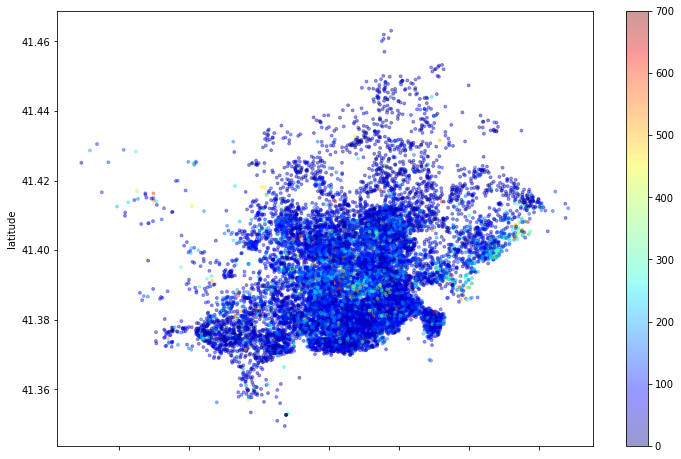

In [36]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Podemos ver mais pontos tendendo para o vermelho (maiores preços) na região central e nos distritos de Sarrià-Sant Gervasi e Sant Martí. No entanto, como há muitos pontos para valores abaixo de 200 euros, conforme discutido anteriormente, a visualização não é das melhores. Vamos resolver isso transformando a escala de preço em uma escala logarítmica, o que distancia mais as cores:

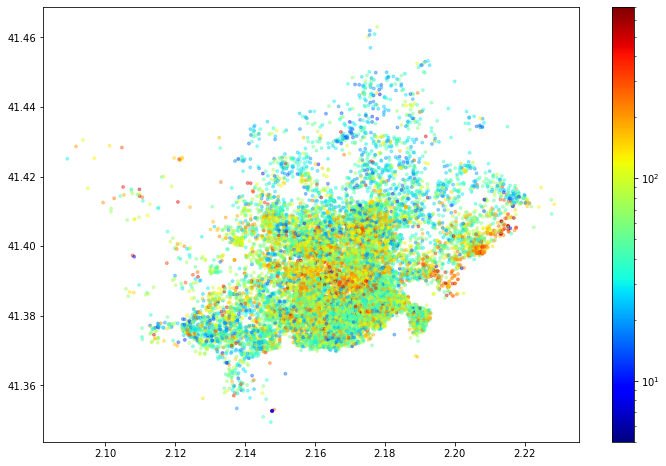

In [37]:
cores = df_clean['price'].values
normaliza_cores = mcolors.LogNorm(vmin=cores.min()+5, vmax=cores.max())
colormap = cm.jet

plt.figure(figsize=(12,8))
plt.scatter(df_clean['longitude'], df_clean['latitude'], c=cores, 
            norm=normaliza_cores, alpha=0.4, s=8, cmap=colormap)

scalarmappaple = cm.ScalarMappable(norm=normaliza_cores, cmap=colormap)
scalarmappaple.set_array(cores)
colorbar = plt.colorbar(scalarmappaple)
plt.show()

Agora vemos com mais clareza o predomínio de cores mais para o extremo vermelho na região central e nos distritos de Sarrià-Sant Gervasi e Sant Martí, o que está de acordo com as discussões já feitas sobre os distritos e bairros.

## Conclusão

Com essa análise conseguimos relacionar a variação de preços das ofertas disponíveis no AirBnb de Barcelona com a localização dos imóveis e características do anúncio como, por exemplo, tempo mínimo de estadia. Também se fez uma breve descrição de questões legais locais e sobre as características principais de distritos e bairros.

Mesmo com uma base de dados resumida, diversos insights foram obtidos. Futuramente uma análise com a base mais completa disponível no site do Inside AirBnb será feita e o link colocado no repositório para consulta. Até mais!